ShapeMapper2 quality control plots
==================================

Known issue: RNAvigate currently does not correctly parse log.txt files from 
ShapeMapper2 >= v2.2

ShapeMapper2 quality control plots display useful quality control metrics:
mutations per read distributions, read length histograms, and modified vs.
untreated per-nucleotide reactivity distributions as a violin plot. These
metrics are contained in the shapemapper_log.txt files output by ShapeMapper2
if the `--per-read-histogram` flag is used.

First, Mutations per read is an important metric to determine if reads in the
modified sample contain more mutations than reads from the untreated sample.
The shift in distribution varies depending on many factors, such as read
length, intrinsic reactivity of the RNA and the probe, cell permeability, 
enzyme fidelity, etc. For single-molecule correlated chemical probing
experiments, the shift in distribution should be dramatic, with modified
samples typically containing 4-10 mutations per read. A bimodal distribution
can be indicative of DNA contamination or compartmental differences in reagent
permeability, as sometimes happens with clumped cells.

Read length distributions for amplicon data should be punctate. Large numbers
of shorter reads indicate poor read merging, possibly due to short overlaps or
low NGS base-calling quality scores.

Per-nucleotide reactivity distributions should show an upward shift in modified
mutation rate compared to untreated rate. This will depend on reagent
reactivity, RNA structuredness, enzyme fidelity, etc.

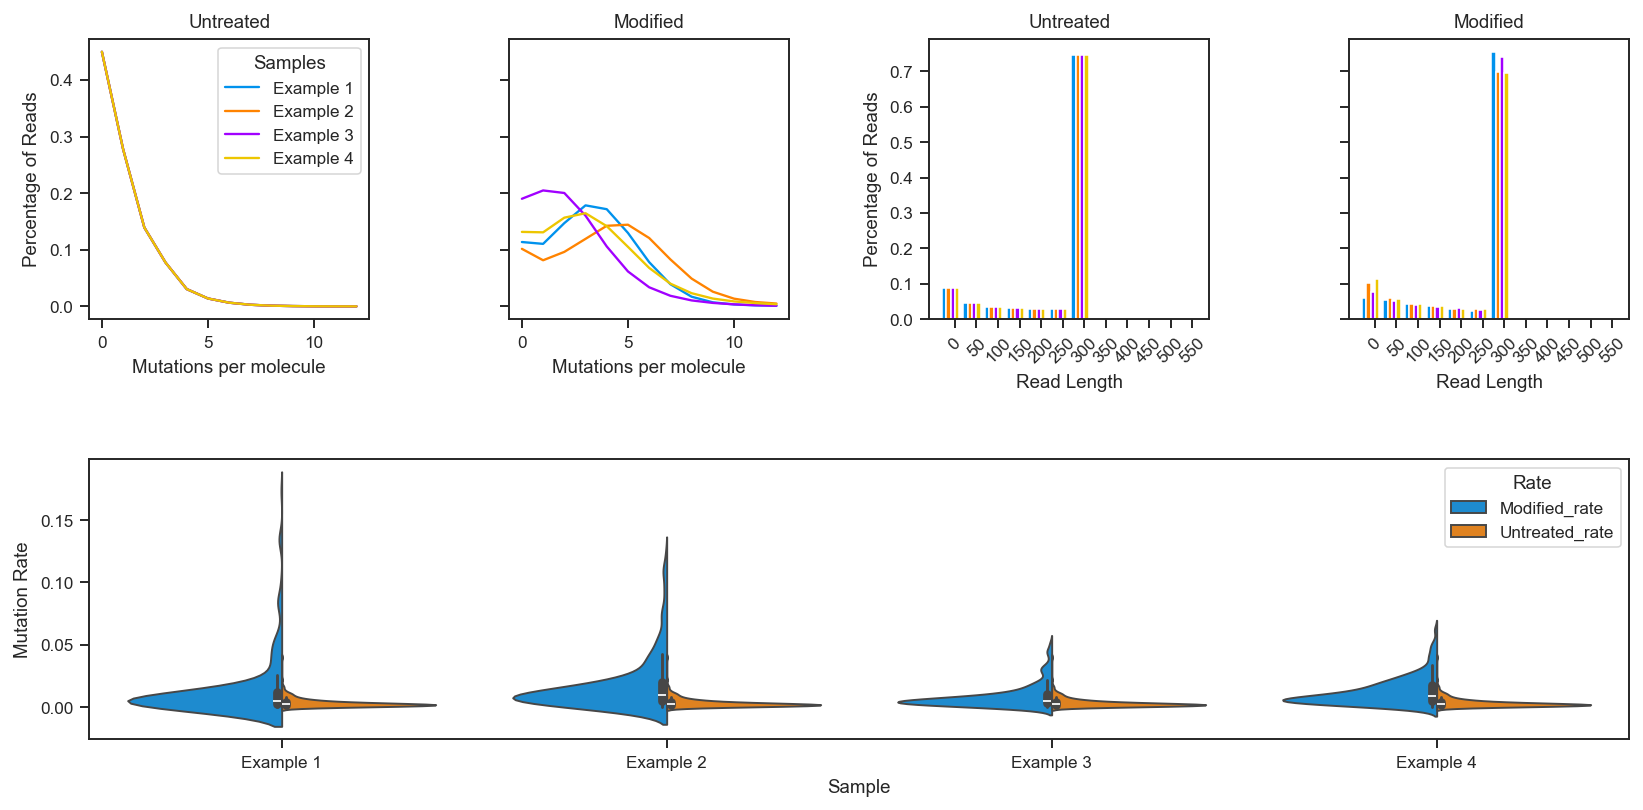

In [1]:
import rnavigate as rnav
from rnavigate.examples import rnasep_1, rnasep_2, rnasep_3, rnasep_4

plot = rnav.plot_qc(
    samples=[rnasep_1, rnasep_2, rnasep_3, rnasep_4],
    profile="shapemap",
)


In [2]:
help(rnav.plot_qc)


Help on function plot_qc in module rnavigate.plotting_functions:

plot_qc(samples, profile, labels=None)
    Creates a multipanel quality control plot displaying mutations per
    molecule, read length distribution, and mutation rate distributions for
    modified and unmodified samples.
    
    Parameters
    ----------
    samples : list of rnavigate.Sample
        samples to retrieve data from
    profile : data keyword string or data object
        ShapeMaP or similar data for plotting reactivity distributions
        Must contain data from ShapeMapper log file
    labels : list of str, defaults to sample.sample for each sample in `samples`
        labels to be used on legends, must be same length as samples list
    
    Returns
    -------
    rnavigate.plots.QC
        the quality control plot object

